Problem - 1: Perform a classification task with knn from scratch.

1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [12]:
# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# Check data types
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [15]:
# Check for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [16]:
# Summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
# More detailed EDA (example)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
# Check the distribution of the target variable
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [20]:
# Assuming 'df' is already loaded as in the previous code

# Check for missing values again (good practice)
df.isnull().sum()

# If there are missing values (as indicated by the previous code)
# Impute missing values with the mean for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
  if df[col].isnull().any():  # Check if column has missing values
    df[col] = df[col].fillna(df[col].mean())

# (Optional) Impute or drop missing values for categorical columns
# Example of imputing with mode (most frequent value) for a categorical column 'Outcome'
# if df['Outcome'].isnull().any():
#     df['Outcome'] = df['Outcome'].fillna(df['Outcome'].mode()[0])


#Alternative: Drop rows with any missing values
# df = df.dropna()

# Verify that there are no more missing values
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [28]:
df_cleaned = df.dropna()

3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [31]:
# • Separate the feature matrix (X) and target variable (y).
X = df_cleaned.drop(columns=['Outcome'])
y = df_cleaned['Outcome']

# • Perform a train - test split from scratch using a 70% − 30% ratio.
split_index = int(0.7 * len(X))

shuffled_indices = np.random.permutation(len(X))
X = X.iloc[shuffled_indices]
y = y.iloc[shuffled_indices]

# Split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Display the resulting splits
print("Shape of Training Features (X_train):", X_train.shape)
print("Shape of Training Target (y_train):", y_train.shape)
print("Shape of Testing Features (X_test):", X_test.shape)
print("Shape of Testing Target (y_test):", y_test.shape)

Shape of Training Features (X_train): (537, 8)
Shape of Training Target (y_train): (537,)
Shape of Testing Features (X_test): (231, 8)
Shape of Testing Target (y_test): (231,)


4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [33]:
import numpy as np

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_one(x_train, y_train, x_test, k):
  distances = [euclidean_distance(x_test, x) for x in x_train.values]
  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = [y_train.iloc[i] for i in k_indices]
  # Predict the class label based on the majority class among the k-nearest neighbors.
  pred = max(set(k_nearest_labels), key=k_nearest_labels.count)
  return pred

def predict_all(x_train, y_train, x_test, k):
  predictions = [predict_one(x_train, y_train, x, k) for x in x_test.values]
  return np.array(predictions)

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
k = 5  # Choose a value for k
y_pred = predict_all(X_train, y_train, X_test, k)
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.7316017316017316


Problem - 2 - Experimentation:

1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data (using the same scaler fitted on the training data)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame (optional, but useful for easier handling)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Now use X_train_scaled and X_test_scaled with your kNN classifier
k = 5  # Choose a value for k
y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
print(f"Accuracy with scaled data: {acc_scaled}")

Accuracy with scaled data: 0.7835497835497836


2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

In [37]:
print(f"Accuracy on original data: {acc}")
print(f"Accuracy on scaled data: {acc_scaled}")

Accuracy on original data: 0.7316017316017316
Accuracy on scaled data: 0.7835497835497836


Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

In [39]:
import time

results = []

for k in range(1, 16):
  start_time = time.time()
  y_pred = predict_all(X_train, y_train, X_test, k)
  end_time = time.time()
  acc = accuracy(y_test, y_pred)
  results.append({
      'k': k,
      'dataset': 'original',
      'accuracy': acc,
      'time': end_time - start_time
  })

  start_time = time.time()
  y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
  end_time = time.time()
  acc_scaled = accuracy(y_test, y_pred_scaled)
  results.append({
      'k': k,
      'dataset': 'scaled',
      'accuracy': acc_scaled,
      'time': end_time - start_time
  })

results_df = pd.DataFrame(results)
results_df

,k,dataset,accuracy,time
0,1,original,0.679654,1.702230
1,1,scaled,0.696970,1.516263
2,2,original,0.701299,0.976526
3,2,scaled,0.718615,0.872494
4,3,original,0.709957,0.899024
5,3,scaled,0.753247,0.877670
6,4,original,0.744589,0.892432
7,4,scaled,0.744589,0.860742
8,5,original,0.731602,0.977910
9,5,scaled,0.783550,0.873360


2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

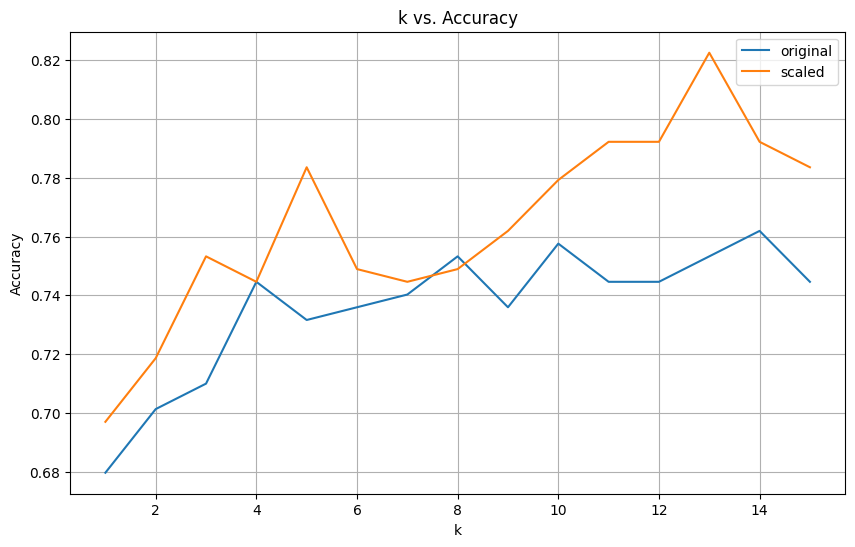

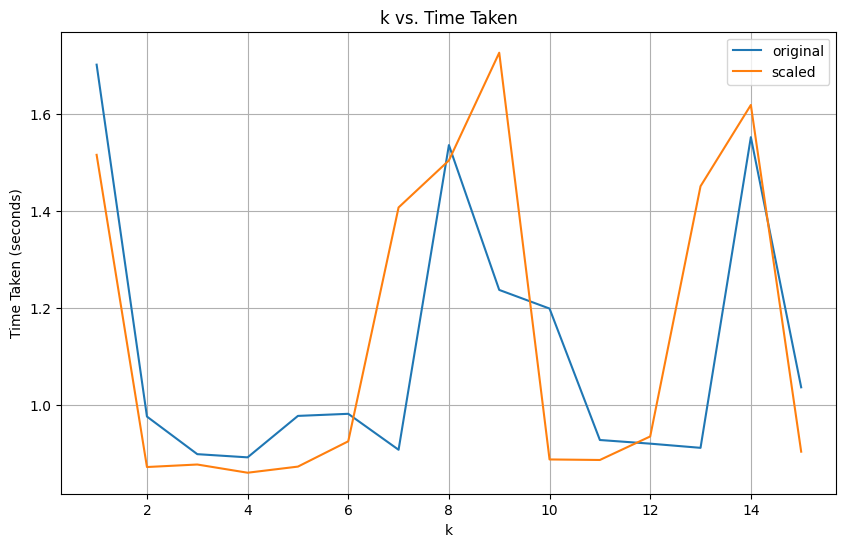

In [40]:
import matplotlib.pyplot as plt

# Assuming results_df is already created as in the previous code

# Plot k vs. Accuracy
plt.figure(figsize=(10, 6))
for dataset in results_df['dataset'].unique():
    subset = results_df[results_df['dataset'] == dataset]
    plt.plot(subset['k'], subset['accuracy'], label=dataset)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot k vs. Time Taken
plt.figure(figsize=(10, 6))
for dataset in results_df['dataset'].unique():
    subset = results_df[results_df['dataset'] == dataset]
    plt.plot(subset['k'], subset['time'], label=dataset)
plt.xlabel('k')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs. Time Taken')
plt.legend()
plt.grid(True)
plt.show()

3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

In [43]:
optimal_k_original = results_df[results_df['dataset'] == 'original']['accuracy'].idxmax()
optimal_k_scaled = results_df[results_df['dataset'] == 'scaled']['accuracy'].idxmax()

print(f"Optimal k for original dataset: {results_df.loc[optimal_k_original, 'k']}")
print(f"Optimal k for scaled dataset: {results_df.loc[optimal_k_scaled, 'k']}")

Optimal k for original dataset: 14
Optimal k for scaled dataset: 13


Problem - 4 - Additional Questions {Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

Challenges of using KNN for large datasets and high-dimensional data:

1. Computational Cost:
   - KNN's time complexity is O(n*d), where n is the number of data points and d is the dimensionality.
   - For large datasets and high-dimensional data, calculating distances between all data points becomes computationally expensive. This makes prediction slow.

2. Curse of Dimensionality:
   - In high-dimensional spaces, the distance between data points tends to become uniform.
   - The concept of "nearest neighbors" becomes less meaningful because all points appear to be equidistant. This reduces the effectiveness of the algorithm.

3. Memory Usage:
   - KNN needs to store the entire training dataset in memory.
   - For large datasets, this can exceed available RAM and lead to performance issues or even crashes.

Strategies to improve the efficiency of KNN:

1. Approximate Nearest Neighbors (ANN):
   - Instead of calculating exact distances to all data points, use approximate methods like k-d trees, ball trees, or locality-sensitive hashing (LSH) to find nearest neighbors quickly.
   - ANN methods trade a small loss in accuracy for a significant speedup.

2. Dimensionality Reduction:
   - Reduce the number of dimensions of the data using techniques like Principal Component Analysis (PCA) or t-distributed Stochastic Neighbor Embedding (t-SNE).
   - This simplifies the data representation, reduces computational cost, and alleviates the curse of dimensionality.

3. Data Subsampling:
   - Randomly select a smaller subset of the training data to represent the overall distribution.
   - This is more efficient but risks losing some information in the original dataset.

4. Optimized Data Structures:
   - Utilize specialized data structures, such as KD-trees or Ball trees, to organize the training data in a way that facilitates efficient nearest neighbor search.

5. Locality Sensitive Hashing:
   - Use LSH to create hash functions that map similar data points to the same hash buckets.
   - This allows for faster approximate nearest neighbor searches without computing all distances.

6. Hybrid Methods:
   - Combine ANN methods with dimensionality reduction to achieve both speed and accuracy gains.